## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Read the dataset

In [5]:
ent=pd.read_csv(r"F:\Data Science\Assignments\Recommendation engine\RECOMMENDATION\Entertainment.csv")
ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        51 non-null     int64  
 1   Titles    51 non-null     object 
 2   Category  51 non-null     object 
 3   Reviews   51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


## Checking duplicates


In [6]:
duplicate = ent.duplicated()
duplicate
sum(duplicate)


0

#### No Duplicates in the data


## Checking for Outlier


<AxesSubplot: >

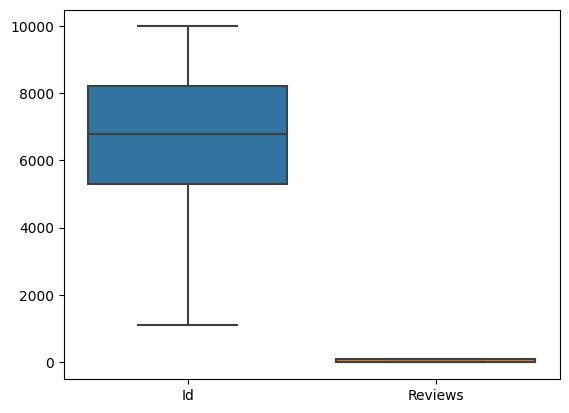

In [7]:
sns.boxplot(data=ent)

### There are no outliers in the data

## Check for count of NA's in each column


In [8]:
ent.isna().sum()


Id          0
Titles      0
Category    0
Reviews     0
dtype: int64

#### there are no na values in the data

## Creating a Tfidf Vectorizer to remove all stop words


In [11]:
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 


In [12]:
# Replacing the NaN values in overview column with empty string
ent["Category"].isnull().sum()


0

## Preparing the Tfidf matrix by fitting and transforming


In [13]:
tfidf_matrix = tfidf.fit_transform(ent.Category)   #Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix.shape 

(51, 34)

#### From the above matrix we need to find the similarity score.
#### There are several metrics for this such as the euclidean, 
#### the Pearson and the cosine similarity scores

#### A numeric quantity to represent the similarity between 2 movies 
#### Cosine similarity - metric is independent of magnitude and easy to calculate 
#### cosine(x,y)= (x.y⊺)/(||x||.||y||)


## Computing the cosine similarity on Tfidf matrix


In [15]:
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)


## creating a mapping of anime name to index number

In [16]:
ent_index = pd.Series(ent.index, index = ent['Titles']).drop_duplicates()

ent_id = ent_index["Assassins (1995)"]
ent_id

22

In [17]:
def get_recommendations(Titles, topN):    
    # topN = 10
    # Getting the movie index using its title 
    ent_id = ent_index[Titles]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[ent_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    # Getting the movie index 
    ent_idx  =  [i[0] for i in cosine_scores_N]
    ent_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar movies and scores
    entr_similar_show = pd.DataFrame(columns=["Titles", "Score"])
    entr_similar_show["Titles"] = ent.loc[ent_idx, "Titles"]
    entr_similar_show["Score"] = ent_scores
    entr_similar_show.reset_index(inplace = True)  
    print (entr_similar_show)
    # The End

## Enter your anime and number of anime's to be recommended


In [18]:
ent_index["Money Train (1995)"]
get_recommendations("Money Train (1995)", topN = 10)

    index                                             Titles     Score
0      19                                 Money Train (1995)  1.000000
1      13                                       Nixon (1995)  0.927868
2      23                                      Powder (1995)  0.583558
3      29  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  0.550845
4       6                                     Sabrina (1995)  0.534361
5       7                                Tom and Huck (1995)  0.422416
6      25                                     Othello (1995)  0.346711
7      42               How to Make an American Quilt (1995)  0.300938
8       3                           Waiting to Exhale (1995)  0.286326
9      22                                   Assassins (1995)  0.276905
10      2                            Grumpier Old Men (1995)  0.264993


### The person watching Money Train can watch Nixon.